In [6]:
# LAB-01
class Graph:
    def __init__(self, adjac_lis):
        self.adjac_lis = adjac_lis
    def get_neighbors(self, v):
        return self.adjac_lis[v]
    def h(self, n):
        H = {
            'A': 1,
            'B': 1,
            'C': 1,
            'D': 1
        }
        return H[n]
    def a_star_algorithm(self, start, stop):
 
 
        open_lst = set([start])
        closed_lst = set([])
        poo = {}
        poo[start] = 0
        par = {}
        par[start] = start
        while len(open_lst) > 0:
            n = None
            for v in open_lst:
                if n == None or poo[v] + self.h(v) < poo[n] + self.h(n):
                    n = v
            if n == None:
                print('Path does not exist!')
                return None
            if n == stop:
                reconst_path = []
                while par[n] != n:
                    reconst_path.append(n)
                    n = par[n]
                reconst_path.append(start)
                reconst_path.reverse()
                print('Path found: {}'.format(reconst_path))
                return reconst_path
 
            for (m, weight) in self.get_neighbors(n):
 
                if m not in open_lst and m not in closed_lst:
                    open_lst.add(m)
                    par[m] = n
                    poo[m] = poo[n] + weight
                else:
                    if poo[m] > poo[n] + weight:
                        poo[m] = poo[n] + weight
                        par[m] = n
                        if m in closed_lst:
                            closed_lst.remove(m)
                            open_lst.add(m)
            open_lst.remove(n)
            closed_lst.add(n)
        print('Path does not exist!')
        return None
adjac_lis = {
    'A': [('B', 1), ('C', 3), ('D', 7)],
    'B': [('D', 5)],
    'C': [('D', 1)]
 }
graph1 = Graph(adjac_lis)
graph1.a_star_algorithm('A', 'D')

Path found: ['A', 'C', 'D']


['A', 'C', 'D']

In [1]:
# LAB-05
import numpy as np
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)
X = X/np.amax(X,axis=0) # maximum of X array longitudinally
y = y/100
#Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))
#Derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)
#Variable initialization
epoch=5000 #Setting training iterations
lr=0.1 #Setting learning rate
inputlayer_neurons = 2 #number of features in data set
hiddenlayer_neurons = 3 #number of hidden layers neurons
output_neurons = 1 #number of neurons at output layer
#weight and bias initialization
wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bh=np.random.uniform(size=(1,hiddenlayer_neurons))
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))
#draws a random range of numbers uniformly of dim x*y
for i in range(epoch):
#Forward Propogation
    hinp1=np.dot(X,wh)
    hinp=hinp1 + bh
    hlayer_act = sigmoid(hinp)
    outinp1=np.dot(hlayer_act,wout)
    outinp= outinp1+ bout
    output = sigmoid(outinp)
#Backpropagation
    EO = y-output
    outgrad = derivatives_sigmoid(output)
    d_output = EO* outgrad
    EH = d_output.dot(wout.T)
#how much hidden layer wts contributed to error
    hiddengrad = derivatives_sigmoid(hlayer_act)
    d_hiddenlayer = EH * hiddengrad
# dotproduct of nextlayererror and currentlayerop
    wout += hlayer_act.T.dot(d_output) *lr
    wh += X.T.dot(d_hiddenlayer) *lr
print("Input: \n" + str(X))
print("Actual Output: \n" + str(y))
print("Predicted Output: \n" ,output)

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.89495434]
 [0.88156108]
 [0.89330419]]


In [5]:
#LAB-04
import math
import csv

def load_csv(filename):
    lines = csv.reader(open(filename,"r"))
    dataset = list(lines)
    headers = dataset.pop(0)
    return dataset, headers

class Node:
    def __init__(self, attribute):
        self.attribute = attribute
        self.children = []
        self.answer = ""

def subtables(data, col, delete):
    dic = {}
    coldata = [row[col] for row in data]
    attr = list(set(coldata))
    for k in attr:
        dic[k] = []
    for y in range(len(data)):
            key=data[y][col]
            if delete:
                del data[y][col]
            dic[key].append(data[y])
    return attr, dic
def entropy(S):
    attr = list(set(S))
    if len(attr) == 1: #if all are +ve/-ve then entropy = 0
        return 0
    counts = [0,0] # Only two values possible 'yes' or 'no'
    for i in range(2):
        counts[i] = sum( [1 for x in S if attr[i] == x] ) / (len(S) * 1.0)
    sums = 0
    for cnt in counts:
        sums += -1 * math.log(cnt, 2)
    return sums
def compute_gain(data, col):
    attValues, dic = subtables(data, col, delete=False)
 
    total_entropy = entropy([row[-1] for row in data])
    for x in range(len(attValues)):
        ratio = len(dic[attValues[x]]) / ( len(data) * 1.0)
        entro = entropy([row[-1] for row in dic[attValues[x]]])
        total_entropy -= ratio*entro
    return total_entropy
def build_tree(data, features):
    lastcol = [row[-1] for row in data]
    if (len(set(lastcol))) == 1: # If all samples have same labels 
        node=Node("")
        node.answer = lastcol[0]
        return node
    n = len(data[0])-1
    gains = [compute_gain(data, col) for col in range(n) ]
    split = gains.index(max(gains)) # Find max gains and returns index
    node = Node(features[split]) # 'node' stores attribute selected
    fea = features[:split]+features[split+1:]
    attr, dic = subtables(data, split, delete=True) 
    for x in range(len(attr)):
        child = build_tree(dic[attr[x]], fea)
        node.children.append((attr[x], child))
    return node
def print_tree(node, level):
    if node.answer != "":
        print(" "*level, node.answer) # Displays leaf node yes/no
        return
    print(" "*level, node.attribute) # Displays attribute Name
    for value, n in node.children:
        print(" "*(level+1), value)
        print_tree(n, level + 2)
def classify(node,x_test,features):
    if node.answer != "":
        print(node.answer)
        return
    pos = features.index(node.attribute)
    for value, n in node.children:
        if x_test[pos]==value:
            classify(n,x_test,features)
dataset, features = load_csv("data3.csv") # Read Tennis data
node = build_tree(dataset, features) # Build decision tree
print("The decision tree for the dataset using ID3 algorithm is ")
print_tree(node, 0)
testdata, features = load_csv("data3_test.csv")
for xtest in testdata:
    print("The test instance : ",xtest)
    print("The predicted label : ")
    classify(node,xtest,features)


The decision tree for the dataset using ID3 algorithm is 
 Outlook
  sunny
   Humidity
    normal
     yes
    high
     no
  rain
   Wind
    weak
     yes
    strong
     no
  overcast
   yes
The test instance :  ['rain', 'cool', 'normal', 'strong']
The predicted label : 
no
The test instance :  ['sunny', 'mild', 'normal', 'strong']
The predicted label : 
yes


In [61]:
#LAB-03
import numpy as np #Numerical Python
import pandas as pd #PANEL DATASTRUCTURES
data = data=pd.read_csv('2 CEA.CSV')
concepts = np.array(data.iloc[:,0:-1])
target = np.array(data.iloc[:,-1])
def learn(concepts, target):
    specific_h = concepts[0].copy()
 
    general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]
 
    for i, h in enumerate(concepts):
 
        if target[i] == "Yes":
            for x in range(len(specific_h)):
 
 
                if h[x] != specific_h[x]:
                    specific_h[x] = '?'
                    general_h[x][x] = '?'
 
   
        if target[i] == "No":
            for x in range(len(specific_h)):
 
 
                if h[x] != specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'
    indices=[i for i,val in enumerate(general_h)if val==['?','?','?','?','?','?']]
 
    for i in indices:
 
        general_h.remove(['?', '?', '?', '?', '?', '?'])
 
  
    return specific_h, general_h
s_final, g_final = learn(concepts, target)
print("Final S:", s_final)
print("Final G:", g_final)


Final S: ['Sunny' 'Warm' '?' 'Strong' '?' '?']
Final G: [['Sunny', '?', '?', '?', '?', '?'], ['?', 'Warm', '?', '?', '?', '?']]


In [3]:
#LAB-06
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics

df=pd.read_csv("pima_indian.csv") 
feature_col_names=['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin','bmi', 'diab_pred','age'] 
predicted_class_names = ['diabetes']
x = df[feature_col_names].values
y = df [predicted_class_names].values

#splitting the dataset into train & test data

xtrain, xtest, ytrain, ytest = train_test_split (x,y,test_size = 0.33)

print('\n The total number of Training Data:',ytrain.shape)

print('\n The total number of Test Data:',ytest.shape)
# Training Naive Bayes (NB) Classifier on training data...

clf = GaussianNB().fit(xtrain, ytrain.ravel())
predicted= clf.predict(xtest) 
predictTestData=clf.predict([[6,148,72, 35, 0,33.6, 0.627, 50]])

#printing Confusion matrix,accuracy, Precision and Recall 
print ('\nConfusion matrix') 
print (metrics.confusion_matrix(ytest,predicted))
print ('\n Accuracy of the classifier is',metrics.accuracy_score(ytest,predicted))

print('\n The value of Precision', metrics.precision_score(ytest, predicted))

print ('\n The value of Recall', metrics.recall_score(ytest, predicted))

print ('Predicted Value for individual Test Data : ', predictTestData)


 The total number of Training Data: (514, 1)

 The total number of Test Data: (254, 1)

Confusion matrix
[[136  34]
 [ 27  57]]

 Accuracy of the classifier is 0.7598425196850394

 The value of Precision 0.6263736263736264

 The value of Recall 0.6785714285714286
Predicted Value for individual Test Data :  [1]


Text(0, 0.5, 'Petal Width')

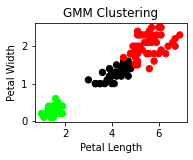

In [7]:
#LAB-7A
from sklearn import preprocessing
# transform your data such that its distribution will have a
# mean value 0 and standard deviation of 1.
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)
gmm_y = gmm.predict(xs)
plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[gmm_y], s=40)
plt.title('GMM Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')


Text(0, 0.5, 'Petal Width')

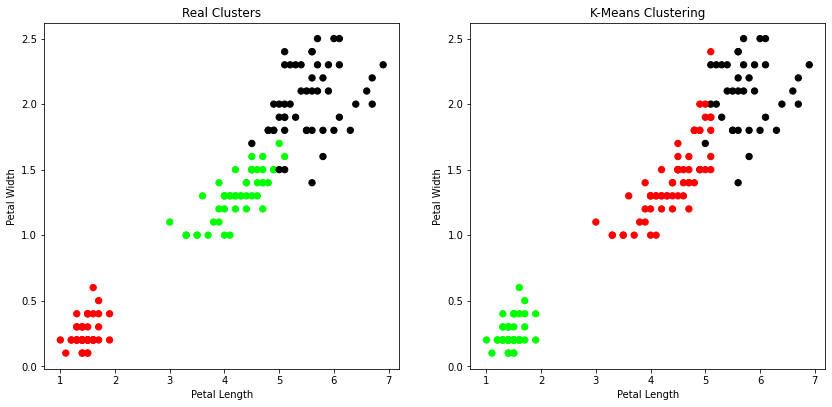

In [6]:
#LAB-7B
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
%matplotlib inline
# import some data to play with
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
model = KMeans(n_clusters=3)
model.fit(X) # model.labels_ : Gives cluster no for which samples belongs to
# # Visualise the clustering results
plt.figure(figsize=(14,14))
colormap = np.array(['red', 'lime', 'black'])
plt.subplot(2, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
# Plot the Models Classifications
plt.subplot(2, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K-Means Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [10]:
#LAB-08
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

iris=datasets.load_iris()
print("Iris Data set loaded...")

x_train, x_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.1)
print("Dataset is split into training and testing...")
print("Size of trainng data and its label",x_train.shape,y_train.shape)
print("Size of testing data and its label",x_test.shape, y_test.shape)

for i in range(len(iris.target_names)):
    print("Label", i , "-",str(iris.target_names[i]))

classifier = KNeighborsClassifier(n_neighbors=12)

classifier.fit(x_train, y_train)

y_pred=classifier.predict(x_test)

print("Results of Classification using K-nn with K=12 ")
for r in range(0,len(x_test)):
    print(" Sample:", str(x_test[r]), " Actual-label:", str(y_test[r]), " Predicted-label:",str(y_pred[r]));
print("Classification Accuracy :" , classifier.score(x_test,y_test));

Iris Data set loaded...
Dataset is split into training and testing...
Size of trainng data and its label (135, 4) (135,)
Size of testing data and its label (15, 4) (15,)
Label 0 - setosa
Label 1 - versicolor
Label 2 - virginica
Results of Classification using K-nn with K=12 
 Sample: [5.  3.5 1.3 0.3]  Actual-label: 0  Predicted-label: 0
 Sample: [5.1 3.3 1.7 0.5]  Actual-label: 0  Predicted-label: 0
 Sample: [6.5 2.8 4.6 1.5]  Actual-label: 1  Predicted-label: 1
 Sample: [5.5 2.4 3.7 1. ]  Actual-label: 1  Predicted-label: 1
 Sample: [6.1 3.  4.9 1.8]  Actual-label: 2  Predicted-label: 2
 Sample: [5.1 3.8 1.5 0.3]  Actual-label: 0  Predicted-label: 0
 Sample: [5.  3.5 1.6 0.6]  Actual-label: 0  Predicted-label: 0
 Sample: [5.8 2.7 5.1 1.9]  Actual-label: 2  Predicted-label: 2
 Sample: [6.6 2.9 4.6 1.3]  Actual-label: 1  Predicted-label: 1
 Sample: [5.2 3.4 1.4 0.2]  Actual-label: 0  Predicted-label: 0
 Sample: [6.  2.9 4.5 1.5]  Actual-label: 1  Predicted-label: 1
 Sample: [6.4 3.2 5.

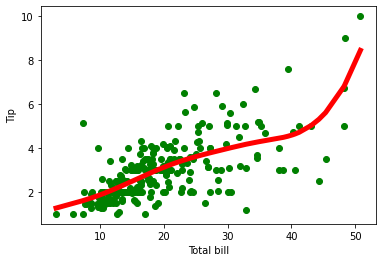

In [8]:
#LAB-09
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
def kernel(point,xmat, k):
    m,n = np.shape(xmat)
    weights = np.mat(np.eye((m))) # eye - identity matrix
    for j in range(m):
        diff = point - X[j]
        weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
    return weights
def localWeight(point,xmat,ymat,k):
    wei = kernel(point,xmat,k)
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W
def localWeightRegression(xmat,ymat,k):
    m,n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred
def graphPlot(X,ypred):
    sortindex = X[:,1].argsort(0) #argsort - index of the smallest
    xsort = X[sortindex][:,0]
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(bill,tip, color='green')
    ax.plot(xsort[:,1],ypred[sortindex], color = 'red', linewidth=5)
    plt.xlabel('Total bill')
    plt.ylabel('Tip')
    plt.show();
data = pd.read_csv('10_tips.csv')
bill = np.array(data.total_bill) 
tip = np.array(data.tip)
mbill = np.mat(bill) # .mat will convert nd array to 2D array
mtip = np.mat(tip)
m= np.shape(mbill)[1]
one = np.mat(np.ones(m))
X = np.hstack((one.T,mbill.T)) # 244 rows, 2 cols
ypred = localWeightRegression(X,mtip,5) 
graphPlot(X,ypred)


In [9]:
#LAB-02
class Graph:
    def __init__(self, graph, heuristicNodeList, startNode):
        self.graph = graph
        self.H=heuristicNodeList
        self.start=startNode
        self.parent={}
        self.status={}
        self.solutionGraph={}
 
    def applyAOStar(self): # starts a recursive AO* algorithm
        self.aoStar(self.start, False) 
    def getNeighbors(self, v): 
        return self.graph.get(v,'')
    def getStatus(self,v): # return the status of a given node
        return self.status.get(v,0)
    def setStatus(self,v, val): # set the status of a given node
        self.status[v]=val
    def getHeuristicNodeValue(self, n):
        return self.H.get(n,0) 
 
    def setHeuristicNodeValue(self, n, value):
        self.H[n]=value 
    def printSolution(self):
        print("FOR GRAPH SOLUTION, TRAVERSE THE GRAPH FROM THE START NODE:",self.start)
        print("-----------------------------------------------")
        print(self.solutionGraph)
        print("-----------------------------------------------")
    def computeMinimumCostChildNodes(self, v):
        minimumCost=0
        costToChildNodeListDict={}
        costToChildNodeListDict[minimumCost]=[]
        flag=True
        for nodeInfoTupleList in self.getNeighbors(v):
            cost=0
            nodeList=[]
            for c, weight in nodeInfoTupleList:
                cost=cost+self.getHeuristicNodeValue(c)+weight
                nodeList.append(c)
            if flag==True:
                minimumCost=cost
                costToChildNodeListDict[minimumCost]=nodeList 
                flag=False
 
            else:
                if minimumCost>cost:
                    minimumCost=cost
                    costToChildNodeListDict[minimumCost]=nodeList 
        return minimumCost, costToChildNodeListDict[minimumCost]
    def aoStar(self, v, backTracking):
        print("HEURISTIC VALUES :", self.H)
        print("SOLUTION GRAPH :", self.solutionGraph)
        print("PROCESSING NODE :", v)
        print("----------------------------------------------")
        if self.getStatus(v) >= 0:
            minimumCost, childNodeList = self.computeMinimumCostChildNodes(v)
            print(minimumCost, childNodeList)
            self.setHeuristicNodeValue(v, minimumCost)
            self.setStatus(v,len(childNodeList))
            solved=True 
            for childNode in childNodeList:
                self.parent[childNode]=v
                if self.getStatus(childNode)!=-1:
                    solved=solved & False
            if solved==True:
                self.setStatus(v,-1)
                self.solutionGraph[v]=childNodeList 
            if v!=self.start:
                self.aoStar(self.parent[v], True)
            if backTracking==False:
                for childNode in childNodeList:
                    self.setStatus(childNode,0)
                    self.aoStar(childNode, False) 
print ("Graph - 1")
h1 = {'A': 1, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1}
graph1 = {
    'A': [[('B', 1), ('C', 1)], [('D', 1)]],
    'B': [[('G', 1)], [('H', 1)]],
    'C': [[('J', 1)]],
    'D': [[('E', 1), ('F', 1)]],
    'G': [[('I', 1)]]
}
G1= Graph(graph1, h1, 'A')
G1.applyAOStar()
G1.printSolution()


Graph - 1
HEURISTIC VALUES : {'A': 1, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1}
SOLUTION GRAPH : {}
PROCESSING NODE : A
----------------------------------------------
10 ['B', 'C']
HEURISTIC VALUES : {'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1}
SOLUTION GRAPH : {}
PROCESSING NODE : B
----------------------------------------------
6 ['G']
HEURISTIC VALUES : {'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1}
SOLUTION GRAPH : {}
PROCESSING NODE : A
----------------------------------------------
10 ['B', 'C']
HEURISTIC VALUES : {'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1}
SOLUTION GRAPH : {}
PROCESSING NODE : G
----------------------------------------------
8 ['I']
HEURISTIC VALUES : {'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 8, 'H': 7, 'I': 7, 'J': 1}
SOLUTION GRAPH : {}
PROCESSING NODE : B
----------------------------------------------
8 